In [16]:
import xarray as xr
import numpy as np
from math import pi
import datetime as dt
import os
import sys
#        dir_data = 'F:/data/sat_data/aviso/'
from pathlib import Path
from os.path import exists
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pathlib import Path
from datetime import *; from dateutil.relativedelta import *
from scipy.interpolate import make_interp_spline, BSpline
from scipy.signal import savgol_filter
boxes_names = ['NPC','NPC_biforcation','CalCur','Alaska1','Alaska2','CalCur1','CalCur3']

In [17]:
dir_timeseries='F:/data/NASA_biophysical/timeseries_data/'
date_start,date_end,date_end2='1993-01-01','2018-12-31','2019-10-31'
darray = ['oscar','mld','ccmp','sst','sss','ssh']


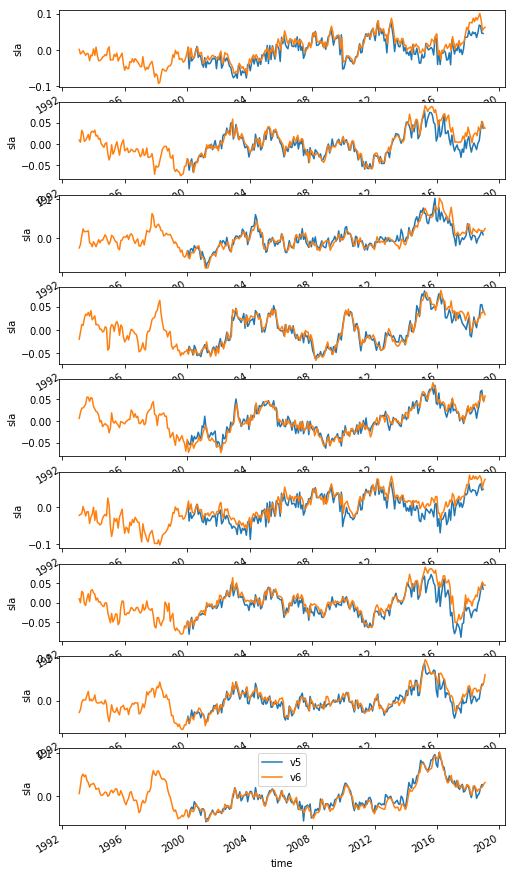

In [43]:
#testing
dtype=darray[5]
#fname=dir_timeseries + dtype +str(date_start)+'data_v6.nc'
fname=dir_timeseries + dtype +str(date_start)+'data_minus_clim_v6.nc'
#fname=dir_timeseries + dtype +str(date_start)+'data_clim_v6.nc'
ds=xr.open_dataset(fname)
ds.close()
#ds
#fname=dir_timeseries + dtype +'data_v5.nc'
fname=dir_timeseries + dtype +'data_minus_clim_v5.nc'
#fname=dir_timeseries + dtype +'data_clim_v5.nc'
ds2=xr.open_dataset(fname)
ds2.close()
#ds
#ds.analysed_sst[5,:].plot(label='v6')
#ds2.analysed_sst[5,:].plot(label='v5')
#ds.u[5,:].plot(label='v6')
fig, axs = plt.subplots(9,figsize=(8,15))
for i in range(9):
    ds2.zos[i,:].plot(ax=axs[i],label='v5')
    ds.sla[i,:].plot(ax=axs[i],label='v6')
#ds2.ugos[5,:].plot(label='v5')
axs[i].legend()

In [35]:
ds2

<xarray.Dataset>
Dimensions:  (box: 9, time: 228)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16T12:00:00 ... 2018-12-16T12:00:00
Dimensions without coordinates: box
Data variables:
    zos      (box, time) float64 ...